# Understanding Random Forests

Random Forests build multiple decision trees during training and aggregate their outputs to improve performance and reduce the risk of overfitting.

---

## How Random Forests Work

1. **Dataset Preparation**
   - From the original dataset, generate multiple **bootstrap samples**.
   - Each sample will be used to train a single decision tree.

2. **Tree Construction**
   - For each tree:
     - Select a random subset of features at each node.
     - Split the data based on the feature that gives the best split (minimizes gini impurity or maximizes information gain).

3. **Prediction**
   - **For classification**: Each tree votes on the predicted class. The class with the majority vote is chosen.
   - **For regression**: The average of all tree predictions is used.

4. **To Calculate Error**
   - For evaluation, random forests use data not included in the bootstrap sample (out-of-bag data) which helps estimate model accuracy without a separate validation set.

---


![Random Forest Diagram](random-forest-img.png)

---

## Advantages of Random Forests

- **Robustness**: (Classification and Regression tasks)
- **Resistant to Overfitting**: Averaging multiple trees reduces variance.
- **Feature Importance** (Provides a ranking of feature importances)
  
---

## Limitations

- **Interpretability**: The ensemble nature makes them less interpretable than individual decision trees since it aggregates them.
- **Higher Computational Cost**

---

## Example Applications

- **Classification Tasks**: Spam detection, fraud detection, and medical diagnosis.
- **Regression Tasks**: Predicting house prices, stock prices, or environmental data.

---

In [39]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('forestfires.csv', delimiter=',')

# Convert 'month' values to numerical values
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
df['month'] = df['month'].map(month_mapping)

# Convert 'day' values to numerical values
day_mapping = {'sun': 1, 'mon': 2, 'tue': 3, 'wed': 4, 'thu': 5, 'fri': 6, 'sat': 7}
df['day'] = df['day'].map(day_mapping)

df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,6,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,3,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,1,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


## Plotting Data

Let's plot our data in the 2D plane. We will explore relationships between the area of the fire and every other feature. 

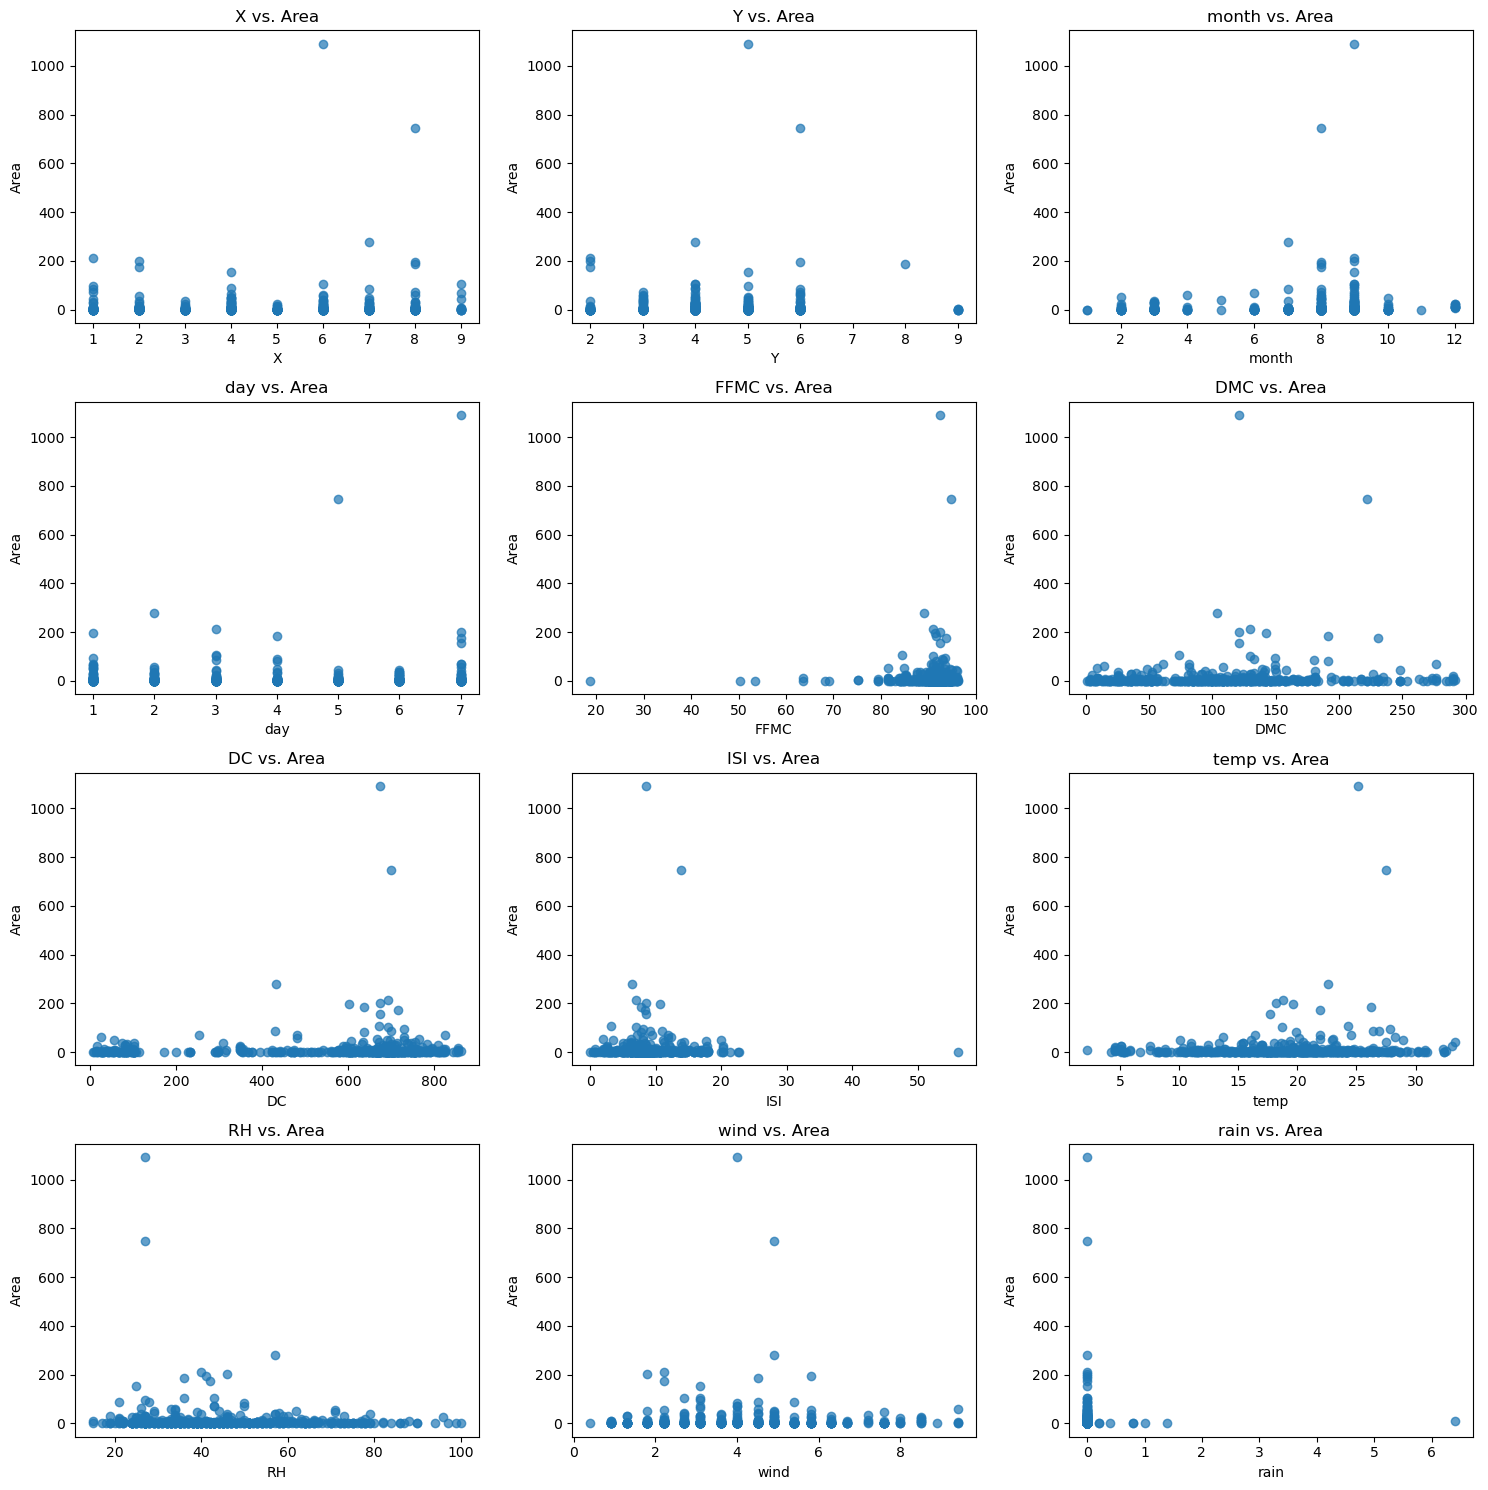

In [27]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
axes = axes.flatten()

for i, feature in enumerate(features):
    axes[i].scatter(df[feature], df['area'], alpha=0.7)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Area')
    axes[i].set_title(f'{feature} vs. Area')

plt.tight_layout()
plt.show()


              X         Y     month       day      FFMC       DMC        DC  \
X      1.000000  0.539548 -0.065003  0.013037 -0.021039 -0.048384 -0.085916   
Y      0.539548  1.000000 -0.066292 -0.013085 -0.046308  0.007782 -0.101178   
month -0.065003 -0.066292  1.000000 -0.037469  0.291477  0.466645  0.868698   
day    0.013037 -0.013085 -0.037469  1.000000  0.073597  0.028697  0.001913   
FFMC  -0.021039 -0.046308  0.291477  0.073597  1.000000  0.382619  0.330512   
DMC   -0.048384  0.007782  0.466645  0.028697  0.382619  1.000000  0.682192   
DC    -0.085916 -0.101178  0.868698  0.001913  0.330512  0.682192  1.000000   
ISI    0.006210 -0.024488  0.186597  0.035926  0.531805  0.305128  0.229154   
temp  -0.051258 -0.024103  0.368842  0.032233  0.431532  0.469594  0.496208   
RH     0.085223  0.062221 -0.095280 -0.083318 -0.300995  0.073795 -0.039192   
wind   0.018798 -0.020341 -0.086368 -0.004013 -0.028485 -0.105342 -0.203466   
rain   0.065387  0.033234  0.013438 -0.024119  0.056

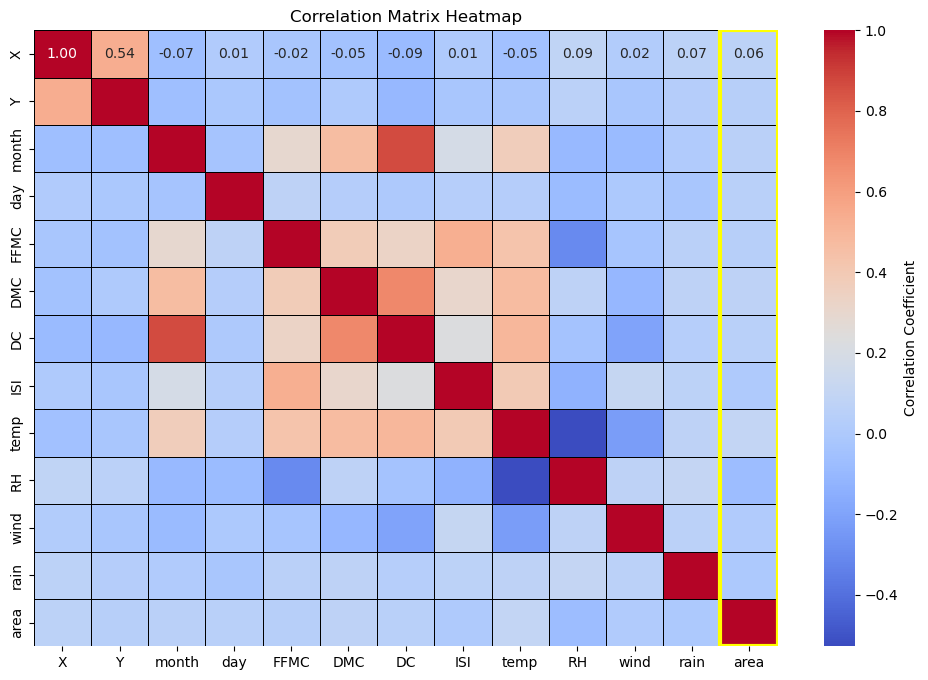

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    cbar_kws={'label': 'Correlation Coefficient'},
    annot_kws={'size': 10},
    linewidths=0.5,
    linecolor='black'
)

# Highlight the 'area' column
for i in range(len(correlation_matrix.columns)):
    if correlation_matrix.columns[i] == 'area':
        plt.gca().add_patch(plt.Rectangle((i, 0), 1, len(correlation_matrix.columns),
                                          fill=False, edgecolor='yellow', lw=3))

# Add title
plt.title('Correlation Matrix Heatmap')

print(correlation_matrix)

# Show plot
plt.show()


## Plan

Looking at the area column (highlighted in yellow), we can see that there is very low correlation between area and all the other features (the highest in absolute value terms is temprature with only 0.097844).

Creating a random forest to predict the area of fires will most likely give us results with a wide margin of error, but we can try anyway. To demonstrate the power of random forests, we can try plotting 'month' vs 'DC' (Drought Code) which are inherently dependent algorithmically.

Lastly, we will make a random forest model that predicts the wind speed, which contains less total correlation with other features than the month, but more than area.

Mean Squared Error: 12168.996197653887
Mean Squared Error with Log Transform: 12091.332739539563
Mean of area values: 12.847292069632493
Variance of area values: 4044.225578353752


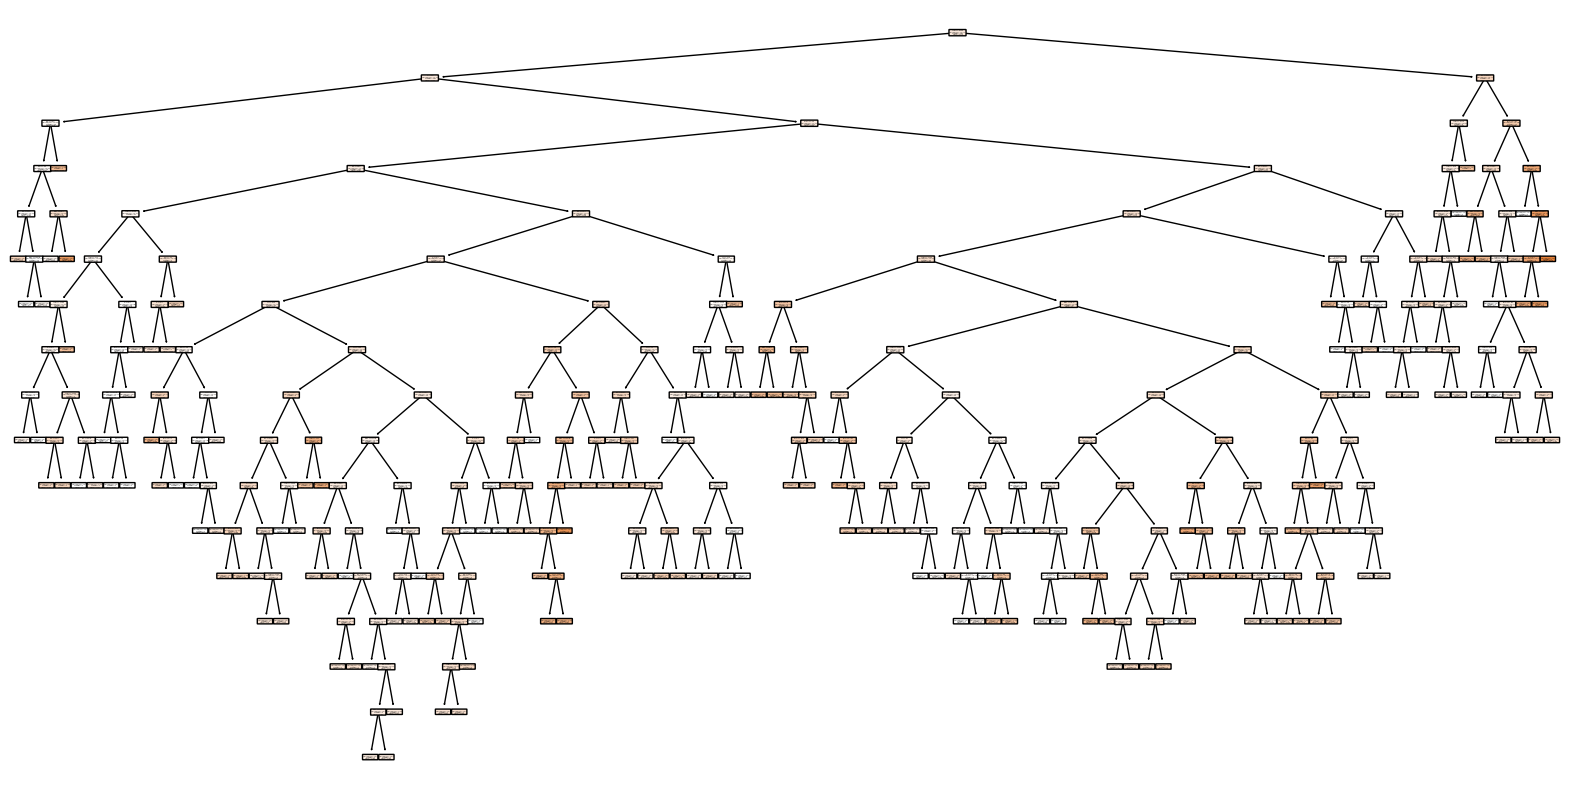

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
import numpy as np

# Define the features and target variable
X = df.drop(columns=['area'])
y = df['area']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the random forest regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Apply logarithmic transformation to the target variable
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Train the model with the transformed target variable
rf.fit(X_train, y_train_log)

# Make predictions
y_pred_log = rf.predict(X_test)

# Inverse the logarithmic transformation
y_pred = np.expm1(y_pred_log)

# Calculate the mean squared error
mse_log = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error with Log Transform: {mse_log}')

# Calculate the mean and variance of the area values
mean_area = np.mean(df['area'])
variance_area = np.var(df['area'])

print(f'Mean of area values: {mean_area}')
print(f'Variance of area values: {variance_area}')

# Plot one of the trees in the forest
plt.figure(figsize=(20, 10))
plot_tree(rf.estimators_[0], feature_names=X.columns, filled=True, rounded=True)
plt.show()



### Results predicting Area

The average squared distance is 12168.996197653887. Taking the RMSE, we find that on average, predicted values for area are off by $\approx 110$ hectacres. This is $\approx 0.42$ square miles. This is not good, considering that the MSE is around 3 times the value of the variance (in a good model, it would be smaller).

Let's rerun it after removing the outliers.

In [30]:
# Calculate the IQR for the 'area' column
Q1 = df['area'].quantile(0.25)
Q3 = df['area'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_no_outliers = df[(df['area'] >= lower_bound) & (df['area'] <= upper_bound)]

# Define the features and target variable
X_no_outliers = df_no_outliers.drop(columns=['area'])
y_no_outliers = df_no_outliers['area']

# Split the data into training and testing sets
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

# Train the random forest model
rf_no_outliers = RandomForestRegressor(n_estimators=100, random_state=42)
rf_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

# Make predictions
y_pred_no_outliers = rf_no_outliers.predict(X_test_no_outliers)

# Calculate the mean squared error
mse_no_outliers = mean_squared_error(y_test_no_outliers, y_pred_no_outliers)
print(f'Mean Squared Error without outliers: {mse_no_outliers}')

# Calculate the mean and variance of the area values without outliers
mean_area_no_outliers = np.mean(df_no_outliers['area'])
variance_area_no_outliers = np.var(df_no_outliers['area'])

print(f'Mean of area values without outliers: {mean_area_no_outliers}')
print(f'Variance of area values without outliers: {variance_area_no_outliers}')

Mean Squared Error without outliers: 15.546966662610343
Mean of area values without outliers: 2.3317841409691633
Variance of area values without outliers: 14.26521774195109


#### Area Prediction Without Outliers

This model works better without the outliers, but it's still not great; the MSE is still higher than the variance. 

This makes sense based on our analysis of the correlation matrix. The data just doesn't contain very many correlations between area and other features.


## Month Prediction

We would expect the random forest to perform much better on features that have non-trivial correlation with at least one other feature. Let's try and determine the month of the fire through the other features.

Accuracy: 0.9519230769230769


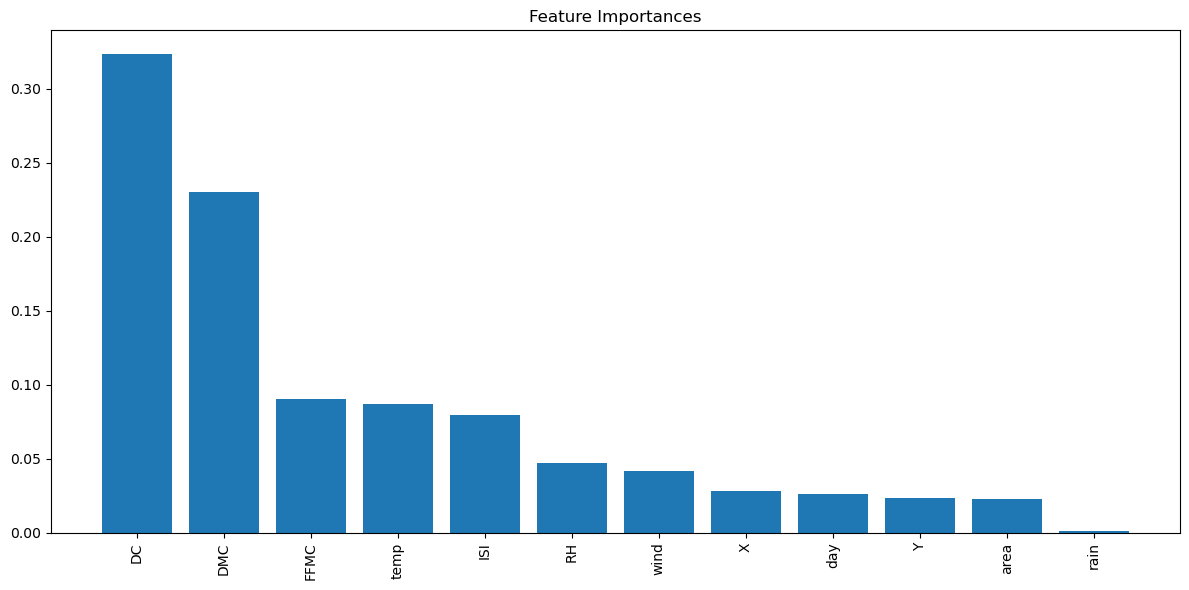

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Define the features and target variable
X_month = df.drop(columns=['month'])
y_month = df['month']

# Split the data into training and testing sets
X_train_month, X_test_month, y_train_month, y_test_month = train_test_split(X_month, y_month, test_size=0.2, random_state=42)

# Create the random forest classifier
rf_month = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_month.fit(X_train_month, y_train_month)

# Make predictions
y_pred_month = rf_month.predict(X_test_month)

# Calculate the accuracy
accuracy_month = accuracy_score(y_test_month, y_pred_month)
print(f'Accuracy: {accuracy_month}')

# Plot the feature importances
importances = rf_month.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_month.columns

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X_month.shape[1]), importances[indices], align='center')
plt.xticks(range(X_month.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

# Results of Month Prediction

As predicted, our model was able to anticipate the month of each fire pretty well. Also as expected, the feature importances are pretty consistent with the magnitude of the correlation values we analyzed in the correlation matrix.

The features DC, DMC, and FFMC are all values that are numeric ratings indicating levels of Drought, and moisture content of various layers in soil which are based on relative humidity, temperature, precipitation, and other metrics which tend to depend on the month of the year.

## Wind Prediction

Now, let's try to predict the wind speed based on the other features. This will likely be less accurate than the month predictor, but hopefully more than the model for the area.

Mean Squared Error for wind prediction: 2.591698855769229
Mean of wind values: 4.017601547388782
Variance of wind values: 3.2038101081600763


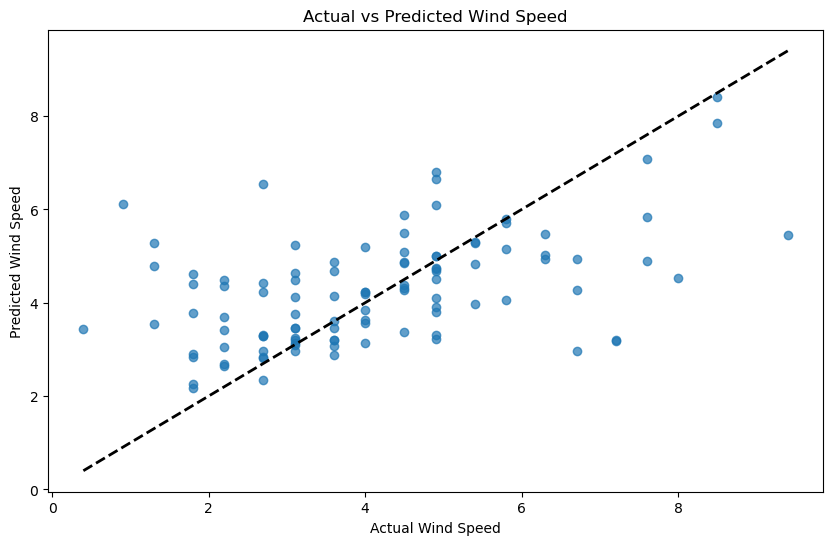

In [37]:
# Define the features and target variable
X_wind = df.drop(columns=['wind'])
y_wind = df['wind']

# Split the data into training and testing sets
X_train_wind, X_test_wind, y_train_wind, y_test_wind = train_test_split(X_wind, y_wind, test_size=0.2, random_state=42)

# Create the random forest regressor
rf_wind = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_wind.fit(X_train_wind, y_train_wind)

# Make predictions
y_pred_wind = rf_wind.predict(X_test_wind)

# Calculate the mean squared error
mse_wind = mean_squared_error(y_test_wind, y_pred_wind)
print(f'Mean Squared Error for wind prediction: {mse_wind}')

# Calculate the mean and variance of the wind values
mean_wind = np.mean(df['wind'])
variance_wind = np.var(df['wind'])

print(f'Mean of wind values: {mean_wind}')
print(f'Variance of wind values: {variance_wind}')

# Plot the actual vs predicted wind values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_wind, y_pred_wind, alpha=0.7)
plt.plot([y_test_wind.min(), y_test_wind.max()], [y_test_wind.min(), y_test_wind.max()], 'k--', lw=2)
plt.xlabel('Actual Wind Speed')
plt.ylabel('Predicted Wind Speed')
plt.title('Actual vs Predicted Wind Speed')
plt.show()


## Results of Wind Prediction

As expected, this random forest did better than the one for area prediction; the MSE gives us an average error of $\approx 1.6$ km/hr when taking the square root (RMSE) — that's not bad! Furthermore, the MSE is lower than the variance which is a good sign. 

**Let's write some code that will tune the parameters our model to find the lowest MSE!**

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import warnings

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the random forest regressor
rf_wind = RandomForestRegressor(random_state=42)

# Suppress warnings during GridSearchCV
with warnings.catch_warnings():
    warnings.simplefilter('ignore')  # Ignore warnings temporarily
    
    # Create the GridSearchCV object
    grid_search = GridSearchCV(
        estimator=rf_wind,
        param_grid=param_grid,
        cv=5,
        n_jobs=-1,
        scoring='neg_mean_squared_error',
        error_score='raise'  # Handle errors explicitly
    )
    
    # Fit the model
    grid_search.fit(X_train_wind, y_train_wind)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Train the model with the best parameters
rf_wind_tuned = RandomForestRegressor(**best_params, random_state=42)
rf_wind_tuned.fit(X_train_wind, y_train_wind)

# Make predictions
y_pred_wind_tuned = rf_wind_tuned.predict(X_test_wind)

# Calculate the mean squared error
mse_wind_tuned = mean_squared_error(y_test_wind, y_pred_wind_tuned)
print(f'Mean Squared Error for tuned wind prediction: {mse_wind_tuned}')


Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error for tuned wind prediction: 2.3993474902788123


### Results

Well, we can change our parameters to:

`{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200`

but this only results in a reduction of 0.19235136549 for our MSE.

## In Conclusion

Our random forest model did pretty well on classifying the month using our feature data, but fell short when tasked with predicting the area. It performed moderately well at predicting the wind speed. 

**This makes sense** because we are using a highly skewed dataset. Looking back to the very first plot of 'feature_x' vs 'area', we find that there are a couple of extreme outliers in every case with not much explanation. We likely don't have enough features, or don't have enough data to run a really effective model on area prediction.

As for the other features, especially ones that are correlated in some way, the model does its job.